# RGB images with Imviz

**Use case**: create RGB images using Imviz programmatically.<br>
**Data**: Carina Nebula, NIRCam observations<br>
**Tools**: jdaviz<br>
**Cross-intrument**: Any imager<br>
**Documentation**: This notebook is part of a STScI's larger [post-pipeline Data Analysis Tools Ecosystem](https://jwst-docs.stsci.edu/jwst-post-pipeline-data-analysis).<br>

For additional resources, please review our provided full example notebooks maintained in the Jdaviz repository: https://github.com/spacetelescope/jdaviz/tree/main/notebooks

Import modules needed for this notebook:

In [1]:
import warnings

from astroquery.mast import Observations

from jdaviz import Imviz

from IPython.display import Image

## Download images and load Imviz

We create an Imviz instance and grab the default viewer instance as well:

In [2]:
imviz = Imviz()

Let's download some data. The images are quite large. The download will take a few minutes.

In [3]:
data_dir = '.'

files = ['jw02731-o001_t017_nircam_clear-f090w_i2d.fits',
         'jw02731-o001_t017_nircam_clear-f187n_i2d.fits',
         'jw02731-o001_t017_nircam_clear-f200w_i2d.fits',
         'jw02731-o001_t017_nircam_clear-f335m_i2d.fits',
         'jw02731-o001_t017_nircam_clear-f444w_i2d.fits',
         'jw02731-o001_t017_nircam_f444w-f470n_i2d.fits']

for fn in files:
    uri = f"mast:JWST/product/{fn}"
    result = Observations.download_file(uri, local_path=f'{data_dir}/{fn}')

 [Done]


 [Done]


 [Done]


 [Done]


 [Done]


 [Done]


And load into Imviz.

In [4]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    with imviz.batch_load():
        for fn in files:
            imviz.load_data(f'{data_dir}/{fn}', data_label=fn[31:36])

Now, we can display Imviz.

In [5]:
imviz.show()

Application(config='imviz', docs_link='https://jdaviz.readthedocs.io/en/v4.2.1/imviz/index.html', events=['cal…

## Align by WCS
https://jdaviz.readthedocs.io/en/latest/imviz/plugins.html#orientation

The first thing you will probably notice is that the image doesn't take up the entire viewer area. If you press the "b" key to blink to the next image, you will see that this image is zoomed correctly by default. The odd default zoom on the other is because the images are linked by pixel when loaded. We can instead link by WCS (world coordinates) so that the images will be properly aligned.

There are two ways to link in Imviz. Firstly, you can do it from within the UI through the Orientation plugin by selecting "WCS". Either open the plugin tray to the right and search for "Orientation", or execute the following cell to open it automatically:

You can also set the link type from the API using the Imviz Helper:

In [6]:
# Link images by WCS (without affine approximation).
imviz.plugins['Orientation'].align_by = 'WCS'

Now if you blink, the images should be aligned

## Plot Options
The Plot Options plugins allows you to modify how your image appears. Here, we demonstrate how to use it to create RGB images.

To show the Plot Options plugin, either search in the plugin bar, or execute the following cell to open it automatically:

In [7]:
plot_options = imviz.plugins['Plot Options']

We can use the the Assign RGB Preset button, which can be triggered in the UI or with the following cell.

In [8]:
plot_options.image_color_mode = 'One color per layer'
plot_options.apply_RGB_presets()

We just need to adjust the stretch min and max!

In [9]:
plot_options.layer = 'f090w[DATA]'
plot_options.stretch_vmin = 4
plot_options.stretch_vmax = 16
plot_options.image_bias = 0.39

plot_options.layer = 'f187n[DATA]'
plot_options.stretch_vmin = 10
plot_options.stretch_vmax = 16
plot_options.image_bias = 0.74

plot_options.layer = 'f200w[DATA]'
plot_options.stretch_vmin = 1
plot_options.stretch_vmax = 5
plot_options.image_bias = 0.66

plot_options.layer = 'f335m[DATA]'
plot_options.stretch_vmin = 4
plot_options.stretch_vmax = 27
plot_options.image_bias = 0.67

plot_options.layer = 'f444w[DATA]'
plot_options.stretch_vmin = 1
plot_options.stretch_vmax = 14
plot_options.image_bias = 0.56

plot_options.layer = 'f470n[DATA]'
plot_options.stretch_vmin = 1
plot_options.stretch_vmax = 6
plot_options.image_bias = 0.60

Let's export the image we just made.

In [10]:
exporting = imviz.plugins['Export']
exporting.viewer = 'imviz-0'
exporting.filename = 'carina_preset.png'
exporting.export()

PosixPath('/home/runner/work/jdat_notebooks/jdat_notebooks/notebooks/cross_instrument/rgb_imviz/carina_preset.png')

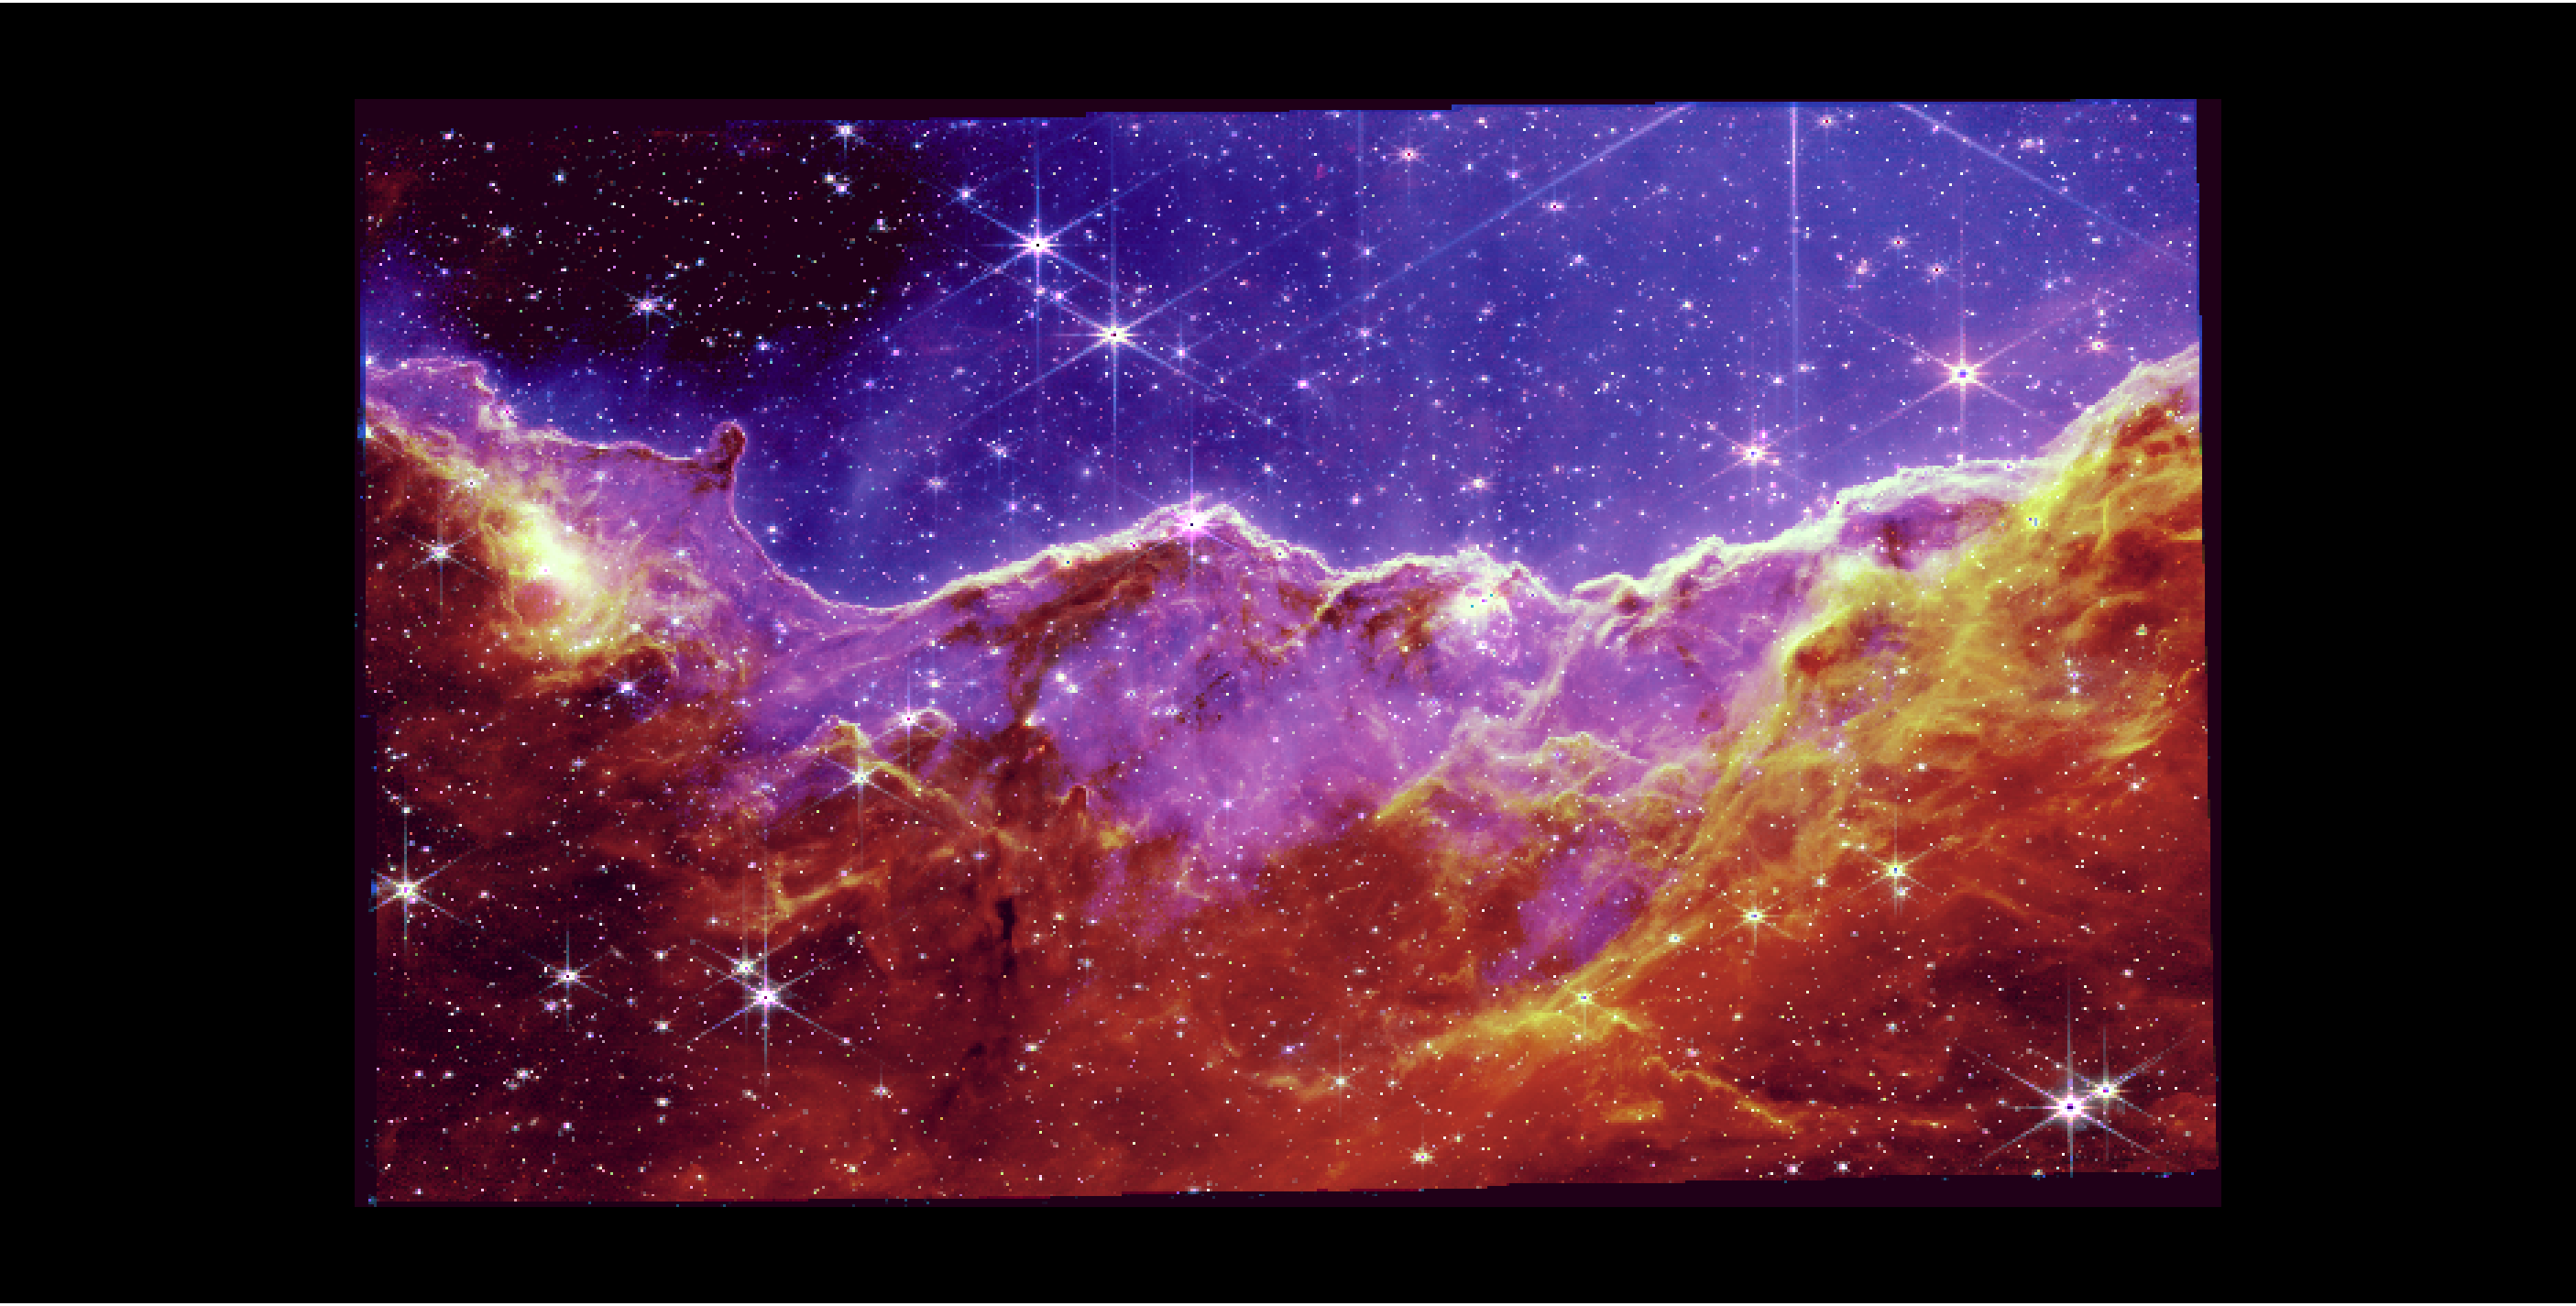

In [11]:
Image('./carina.png')
# Image('./carina_preset.png')

<img style="float: right;" src="https://raw.githubusercontent.com/spacetelescope/notebooks/master/assets/stsci_pri_combo_mark_horizonal_white_bkgd.png" alt="Space Telescope Logo" width="200px"/>

Notebook created by Kyle Conroy and adapted by Duy Nguyen and Camilla Pacifici.